In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Print dataset details
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Classes:", classes)
print("Number of training images:", len(train_images))

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of training images: 50000


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\shane\anaconda3\envs\Python3-10-Build\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 586,250 (2.24 MB)

 Trainable params: 586,250 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint('model_from_scratch.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', restore_best_weights=True)

In [8]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                    epochs=10, batch_size=64, callbacks=[checkpoint, early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.3671 - loss: 1.7209 - val_accuracy: 0.5627 - val_loss: 1.2147
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5843 - loss: 1.1613 - val_accuracy: 0.6720 - val_loss: 0.9557
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6628 - loss: 0.9582 - val_accuracy: 0.6901 - val_loss: 0.9026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7049 - loss: 0.8352 - val_accuracy: 0.7088 - val_loss: 0.8454
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7314 - loss: 0.7538 - val_accuracy: 0.7331 - val_loss: 0.7749
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7586 - loss: 0.6796 - val_accuracy: 0.7421 - val_loss: 0.7358
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7845 - loss: 0.6096 - val_accuracy: 0.7516 - val_loss: 0.7319
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8049 - loss: 0.5457 - 

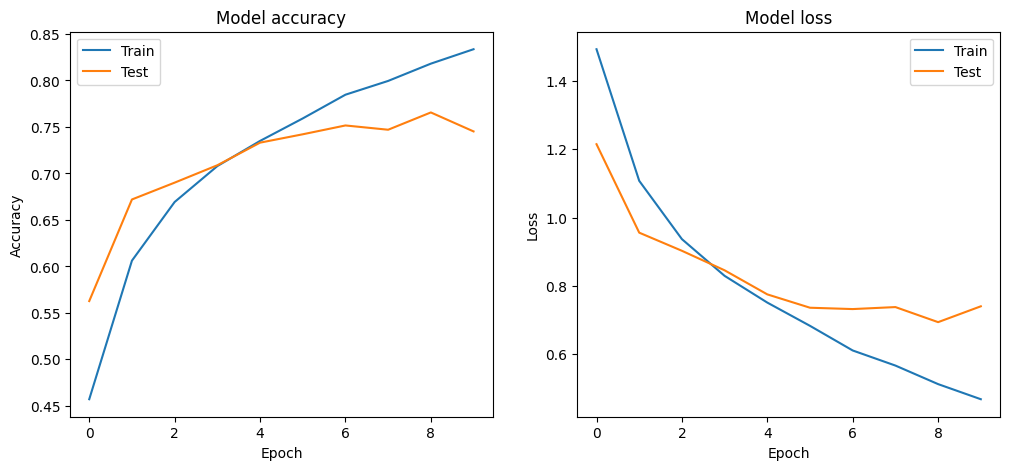

In [9]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


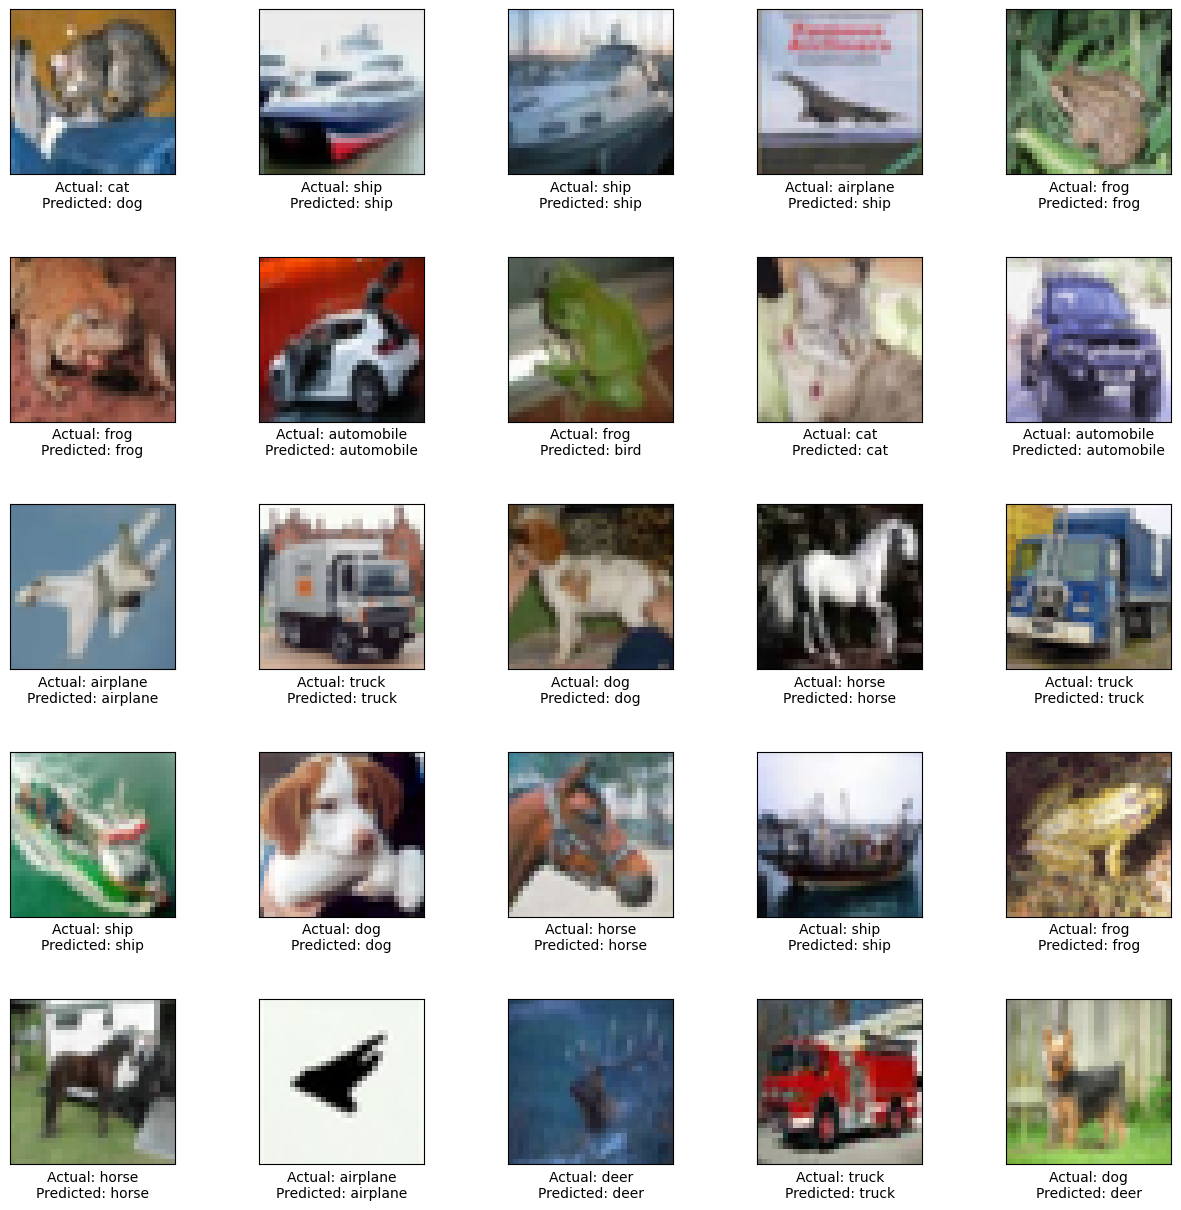

In [10]:
def display_predictions(images, one_hot_labels, predictions):
    plt.figure(figsize=(15, 15))  # Increase figure size for more space
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # Convert one-hot encoded labels to class indices within the function
        actual_label_index = np.argmax(one_hot_labels[i])
        plt.xlabel(f'Actual: {classes[actual_label_index]}\nPredicted: {classes[predictions[i]]}')
    
    # Add spacing between images
    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing here, as needed
    
    plt.show()
    
test_images_subset = test_images[:25]  # Select the first 25 images from the test set
test_labels_subset = test_labels[:25]  # Corresponding labels
predictions = np.argmax(model.predict(test_images_subset), axis=-1)

# Use the function with one-hot encoded labels and predictions
display_predictions(test_images_subset, test_labels_subset, predictions)

In [39]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [40]:
# Freeze the base model
base_model.trainable = False

In [41]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can experiment with the number of units
predictions = Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

model = Model(inputs=base_model.input, outputs=predictions)

In [42]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 25,696,138 (98.02 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
checkpoint = ModelCheckpoint('model_with_pretrained.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', restore_best_weights=True)

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                    epochs=10, batch_size=64, callbacks=[checkpoint, early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 143ms/step - accuracy: 0.2148 - loss: 2.2436 - val_accuracy: 0.3334 - val_loss: 1.8593
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.3056 - loss: 1.9046 - val_accuracy: 0.3283 - val_loss: 1.8315
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.3333 - loss: 1.8347 - val_accuracy: 0.3377 - val_loss: 1.8500
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 144ms/step - accuracy: 0.3412 - loss: 1.8109 - val_accuracy: 0.3478 - val_loss: 1.8136
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.3616 - loss: 1.7658 - val_accuracy: 0.3815 - val_loss: 1.7233
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.3679 - loss: 1.7512 - val_accuracy: 0.3417 - val_loss: 1.8271
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.3675 - loss: 1.7463 - val_accuracy: 0.3739 - val_loss: 1.7170
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.3802 -

In [45]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

In [47]:
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

In [49]:
from tensorflow.keras.optimizers import Adam

In [51]:
# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# Train the model for additional epochs with lower learning rate
history_fine = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                         epochs=10, batch_size=64, 
                         callbacks=[checkpoint, early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 381ms/step - accuracy: 0.2685 - loss: 4.8268 - val_accuracy: 0.1506 - val_loss: 4.7504
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 331s 424ms/step - accuracy: 0.4804 - loss: 1.5628 - val_accuracy: 0.4900 - val_loss: 1.5623
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 422ms/step - accuracy: 0.5254 - loss: 1.3817 - val_accuracy: 0.5019 - val_loss: 1.4921
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 338s 432ms/step - accuracy: 0.5631 - loss: 1.2569 - val_accuracy: 0.5150 - val_loss: 1.4472
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 340s 435ms/step - accuracy: 0.5936 - loss: 1.1699 - val_accuracy: 0.5274 - val_loss: 1.4129
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 332s 424ms/step - accuracy: 0.6211 - loss: 1.0876 - val_accuracy: 0.5382 - val_loss: 1.3808
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 331s 424ms/step - accuracy: 0.6397 - loss: 1.0368 - val_accuracy: 0.5424 - val_loss: 1.3814
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 422ms/step - accuracy: 0.6631 -

In [55]:
checkpoint = ModelCheckpoint('model_with_pretrained.keras', save_best_only=True, monitor='val_accuracy', mode='max')

In [56]:
# Add additional layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(512, activation='relu')(x)  # Add more dense layers if needed
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(10, activation='softmax')(x)  # Adjust the number of units based on your task

In [57]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 30,019,232 (114.51 MB)

 Trainable params: 2,161,546 (8.25 MB)

 Non-trainable params: 23,534,592 (89.78 MB)

 Optimizer params: 4,323,094 (16.49 MB)

In [58]:
# Train the model for additional 10 epochs with added layers
history_fine = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                         epochs=10, batch_size=64, 
                         callbacks=[checkpoint, early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 401ms/step - accuracy: 0.7062 - loss: 0.8539 - val_accuracy: 0.5597 - val_loss: 1.3592
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 334s 427ms/step - accuracy: 0.7236 - loss: 0.8109 - val_accuracy: 0.5610 - val_loss: 1.3566
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 334s 427ms/step - accuracy: 0.7429 - loss: 0.7515 - val_accuracy: 0.5581 - val_loss: 1.3610
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 349s 447ms/step - accuracy: 0.7585 - loss: 0.7113 - val_accuracy: 0.5591 - val_loss: 1.3617
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 351s 449ms/step - accuracy: 0.7694 - loss: 0.6718 - val_accuracy: 0.5655 - val_loss: 1.3672
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 366s 468ms/step - accuracy: 0.7857 - loss: 0.6354 - val_accuracy: 0.5694 - val_loss: 1.3784
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 415ms/step - accuracy: 0.7955 - loss: 0.6017 - val_accuracy: 0.5751 - val_loss: 1.3637
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 332s 425ms/step - accuracy: 0.8098 -

In [59]:
# Train the model for additional 5 epochs
history_fine = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                         epochs=5, batch_size=64, 
                         callbacks=[checkpoint, early_stopping])

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 306s 392ms/step - accuracy: 0.8132 - loss: 0.5553 - val_accuracy: 0.5744 - val_loss: 1.3901
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 305s 390ms/step - accuracy: 0.8224 - loss: 0.5269 - val_accuracy: 0.5731 - val_loss: 1.4145
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 313s 400ms/step - accuracy: 0.8352 - loss: 0.4887 - val_accuracy: 0.5728 - val_loss: 1.4171
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 418ms/step - accuracy: 0.8443 - loss: 0.4671 - val_accuracy: 0.5783 - val_loss: 1.4207
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 359s 459ms/step - accuracy: 0.8544 - loss: 0.4446 - val_accuracy: 0.5744 - val_loss: 1.4401


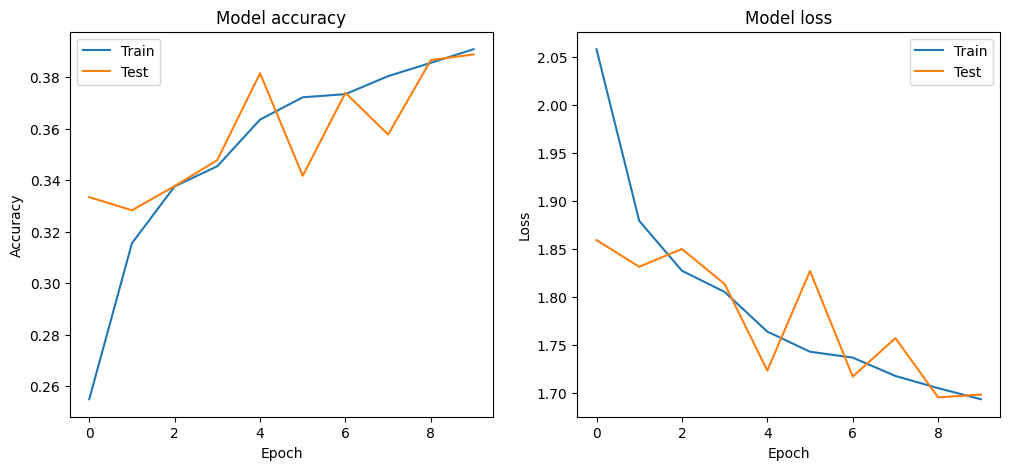

In [60]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

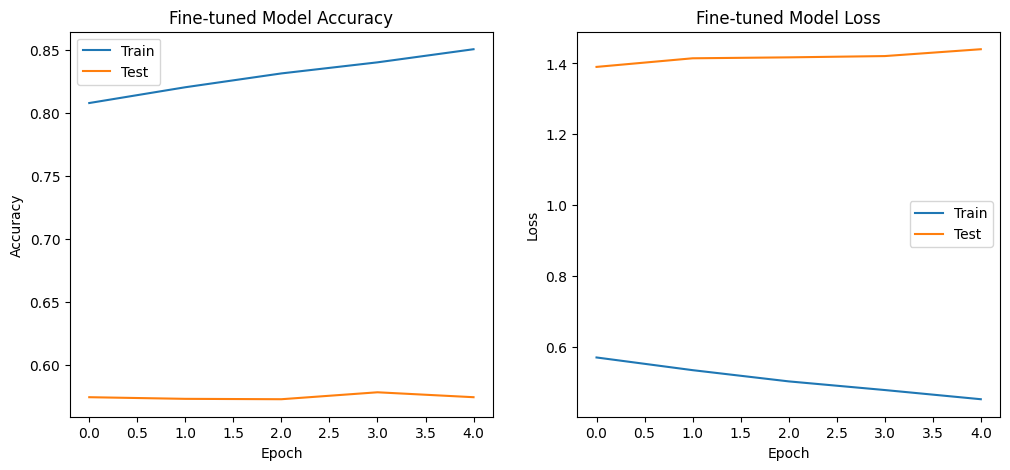

In [61]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values for the fine-tuned model
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train')
plt.plot(history_fine.history['val_accuracy'], label='Test')
plt.title('Fine-tuned Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values for the fine-tuned model
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train')
plt.plot(history_fine.history['val_loss'], label='Test')
plt.title('Fine-tuned Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


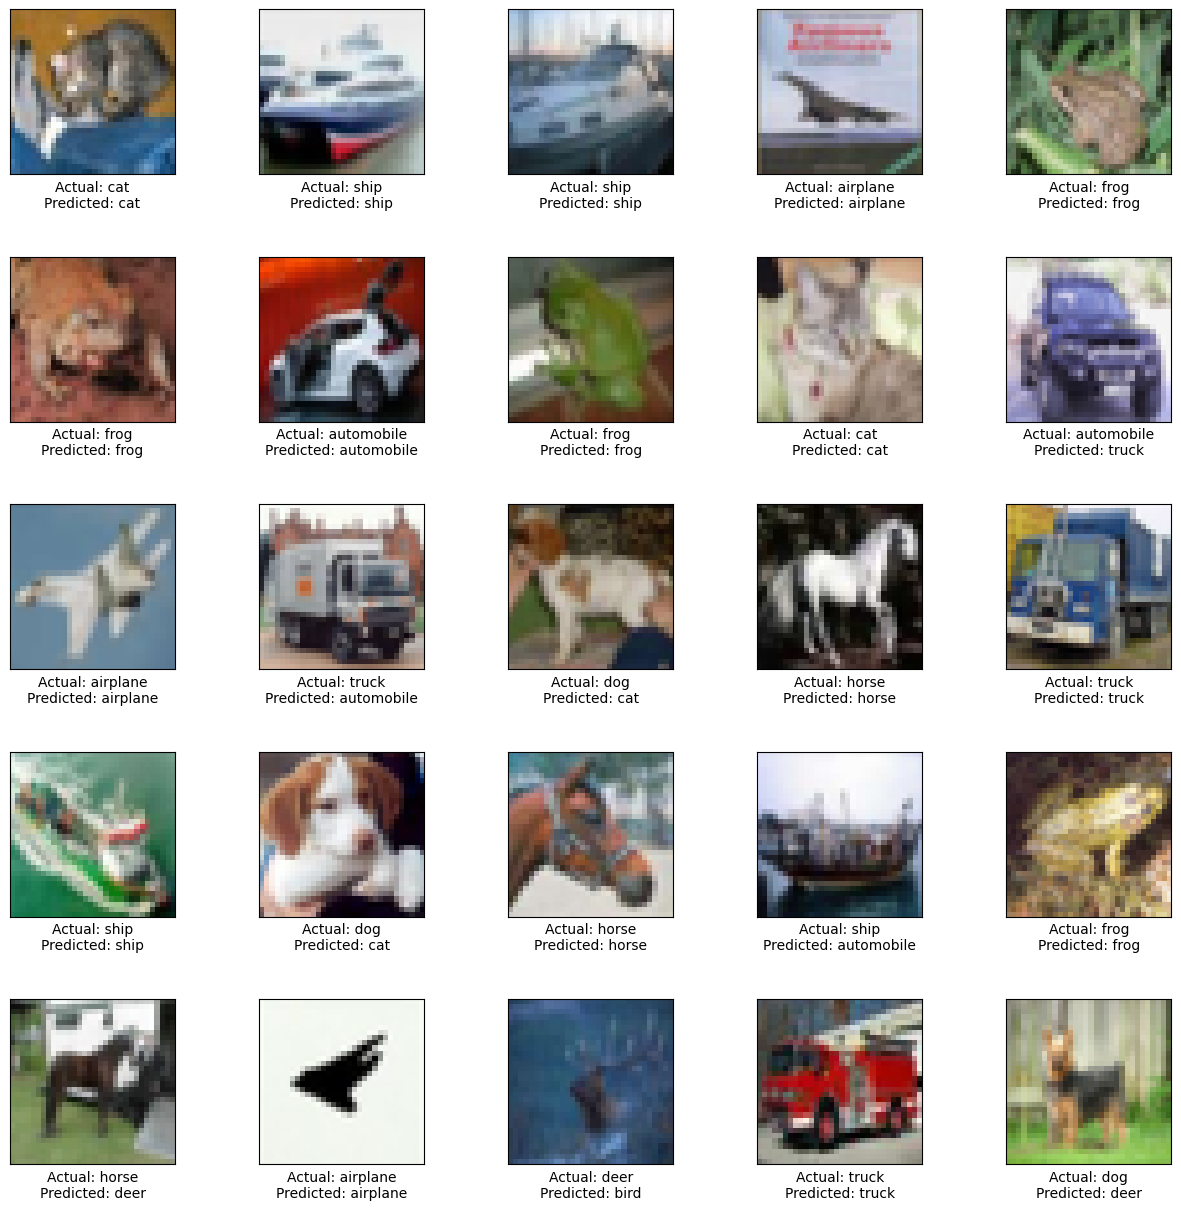

In [62]:
# Generate predictions from the latest model
latest_predictions = np.argmax(model.predict(test_images_subset), axis=-1)

# Display these latest predictions
display_predictions(test_images_subset, test_labels_subset, latest_predictions)